In [2]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
# import wrds

pd.set_option("display.max_rows", None)
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
# db = wrds.Connection(wrds_username='khardnett')

In [4]:
file = "hw i/fdata.csv"
file2 = "hw i/stock_monthly.pkl"

data = pd.read_csv(file)

In [5]:
data.head(100)

,Unnamed: 0,permno,date,ticker,rankyear,exchcd,exret,retadj,lag_me,rf,gvkey,conm,fyear,datadate,mesum,beme,opbe,inv
0,36,10001,1988-07-29,GFGC,1988,3.0,0.024940,0.030000,6.200000,0.005060,12994,GAS NATURAL INC,1987.0,1987-06-30,5828.000,1.207618,0.110827,-0.038474
1,37,10001,1988-08-31,GFGC,1988,3.0,0.023169,0.029126,6.386000,0.005957,12994,GAS NATURAL INC,1987.0,1987-06-30,5828.000,1.207618,0.110827,-0.038474
2,38,10001,1988-09-30,GFGC,1988,3.0,-0.027277,-0.021132,6.572000,0.006145,12994,GAS NATURAL INC,1987.0,1987-06-30,5828.000,1.207618,0.110827,-0.038474
3,39,10001,1988-10-31,GFGC,1988,3.0,0.033142,0.039216,6.362250,0.006074,12994,GAS NATURAL INC,1987.0,1987-06-30,5828.000,1.207618,0.110827,-0.038474
4,40,10001,1988-11-30,GFGC,1988,3.0,-0.005742,0.000000,6.611750,0.005742,12994,GAS NATURAL INC,1987.0,1987-06-30,5828.000,1.207618,0.110827,-0.038474
5,41,10001,1988-12-30,GFGC,1988,3.0,-0.027438,-0.021132,6.611750,0.006306,12994,GAS NATURAL INC,1987.0,1987-06-30,5828.000,1.207618,0.110827,-0.038474
6,42,10001,1989-01-31,GFGC,1988,3.0,0.013842,0.019608,6.362250,0.005766,12994,GAS NATURAL INC,1987.0,1987-06-30,5828.000,1.207618,0.110827,-0.038474
7,43,10001,1989-02-28,GFGC,1988,3.0,0.032352,0.038462,6.487000,0.006110,12994,GAS NATURAL INC,1987.0,1987-06-30,5828.000,1.207618,0.110827,-0.038474
8,44,10001,1989-03-31,GFGC,1988,3.0,0.011565,0.017778,6.736500,0.006213,12994,GAS NATURAL INC,1987.0,1987-06-30,5828.000,1.207618,0.110827,-0.038474
9,45,10001,1989-04-28,GFGC,1988,3.0,0.067264,0.074074,6.736500,0.006810,12994,GAS NATURAL INC,1987.0,1987-06-30,5828.000,1.207618,0.110827,-0.038474


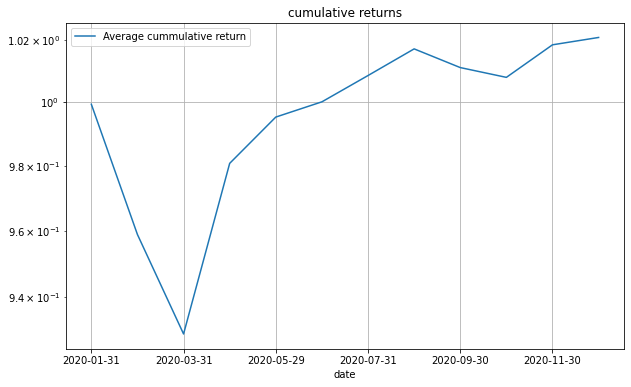

In [6]:
# find date less than 2020 december and greater than 2020 january
new_data = data[(data['date'] > '2020-01-01') & (data['date'] <= '2020-12-31')]


returns = new_data.groupby(['date']).apply(lambda x: np.average(x.retadj, weights=x.lag_me))

(1+returns).expanding().mean().plot(grid=True, logy=True, title="cumulative returns", label='Average cummulative return')
plt.legend()

In [15]:
# invest 1$ at begining of 2020
rate = sum(returns.values)/len(returns.values)

# amount = principal(1 + r/n) ** (month*period)
total = 1*(1+rate/12)**(12*1)
print("Entered market in Jan " ,total)

new_returns = data[(data['date'] > '2020-02-29') & (data['date'] <= '2020-12-31')]

# invest 1$ at begining of march 2020
march_returns = new_returns.groupby(['date']).apply(lambda x: np.average(x.retadj, weights=x.lag_me))

march_rate = sum(march_returns.values)/len(march_returns.values)
total = 1*(1+march_rate/12)**(12*0.75)
print("Entered market in March ", total)

Entered market in Jan  1.0367498931487649
Entered market in March  1.025058799105661


In [8]:
# top 10 performing stocks in 2020
top_stocks = new_data[new_data.exchcd.isin([1, 2, 3])]
company_names = top_stocks['conm'].values

# use set to convert the company names to unique names
# convert back to a list for indexing
unique_names = list(set(company_names))[:10]

print(" Top 10 companies in 2020")
print(unique_names)

 Top 10 companies in 2020
['KASPIEN HOLDINGS INC', 'ROYAL GOLD INC', 'LA JOLLA PHARMACEUTICAL CO', 'NEWAGE INC', 'CHANTICLEER HOLDINGS INC', 'COASTAL FINANCIAL CORP', 'HAYNES INTERNATIONAL INC', 'GENERAL MOTORS CO', 'PULMATRIX INC', 'ALLAKOS INC']


In [9]:
# 2. TECH portfolio
tech_data = data[(data['ticker'] == "TECH")]
tech_data.head(20)

,Unnamed: 0,permno,date,ticker,rankyear,exchcd,exret,retadj,lag_me,rf,gvkey,conm,fyear,datadate,mesum,beme,opbe,inv
1641798,2389831,74924,1980-07-31,TECH,1980,3.0,-0.076710,-0.071429,3.003000,0.005281,10384,TECHTRAN INDUSTRIES INC,1979.0,1979-08-31,4075.500,0.238744,0.233299,0.304993
1641799,2389832,74924,1980-08-29,TECH,1980,3.0,0.359412,0.365385,2.788500,0.005973,10384,TECHTRAN INDUSTRIES INC,1979.0,1979-08-31,4075.500,0.238744,0.233299,0.304993
1641800,2389833,74924,1980-09-30,TECH,1980,3.0,-0.086163,-0.077465,6.762750,0.008698,10384,TECHTRAN INDUSTRIES INC,1979.0,1979-08-31,4075.500,0.238744,0.233299,0.304993
1641801,2389834,74924,1980-10-31,TECH,1980,3.0,0.052157,0.061069,6.238875,0.008912,10384,TECHTRAN INDUSTRIES INC,1979.0,1979-08-31,4075.500,0.238744,0.233299,0.304993
1641802,2389835,74924,1980-11-28,TECH,1980,3.0,0.300458,0.309353,6.619875,0.008895,10384,TECHTRAN INDUSTRIES INC,1979.0,1979-08-31,4075.500,0.238744,0.233299,0.304993
1641803,2389836,74924,1980-12-31,TECH,1980,3.0,-0.162501,-0.148352,8.667750,0.014149,10384,TECHTRAN INDUSTRIES INC,1979.0,1979-08-31,4075.500,0.238744,0.233299,0.304993
1641804,2389837,74924,1981-01-30,TECH,1980,3.0,-0.222860,-0.212903,7.381875,0.009957,10384,TECHTRAN INDUSTRIES INC,1979.0,1979-08-31,4075.500,0.238744,0.233299,0.304993
1641805,2389838,74924,1981-02-27,TECH,1980,3.0,-0.191013,-0.180328,5.810250,0.010685,10384,TECHTRAN INDUSTRIES INC,1979.0,1979-08-31,4075.500,0.238744,0.233299,0.304993
1641806,2389839,74924,1981-03-31,TECH,1980,3.0,0.236843,0.250000,4.800000,0.013157,10384,TECHTRAN INDUSTRIES INC,1979.0,1979-08-31,4075.500,0.238744,0.233299,0.304993
1641807,2389840,74924,1981-04-30,TECH,1980,3.0,-0.066756,-0.056000,6.000000,0.010756,10384,TECHTRAN INDUSTRIES INC,1979.0,1979-08-31,4075.500,0.238744,0.233299,0.304993


Entered market in Jan  1.0367498931487649
Entered market in March  1.0440444242267128


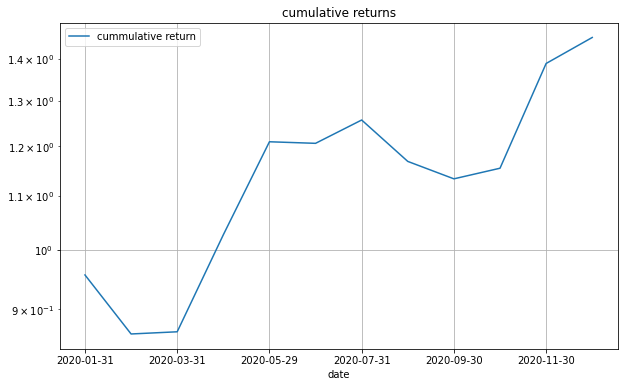

In [16]:
# invest 1$ at begining of 2020 in TECH portfolio
new_tech_data = tech_data[(tech_data['date'] > '2020-01-01') & (tech_data['date'] <= '2020-12-31')]

returns = new_tech_data.groupby(['date']).apply(lambda x: np.average(x.retadj, weights=x.lag_me))

((1+returns).cumprod()).plot(grid=True, logy=True, title="cumulative returns", label='cummulative return')
plt.legend()

rate = sum(returns.values)/len(returns.values)

# amount = principal(1 + r/n) ** (month*period)
total = 1*(1+rate/12)**(12*1)
print("Entered market in Jan ", total)

new_returns = tech_data[(tech_data['date'] > '2020-02-29') & (tech_data['date'] <= '2020-12-31')]

# invest 1$ at begining of march 2020 in TECH
march_returns = new_returns.groupby(['date']).apply(lambda x: np.average(x.retadj, weights=x.lag_me))

march_rate = sum(march_returns.values)/len(march_returns.values)
total = 1*(1+march_rate/12)**(12*0.75)
print("Entered market in March ", total)

In [17]:
# top 10 performing stocks in 2020 in TECH
top_stocks = new_tech_data['conm']

# use set to convert the company names to unique names
# convert back to a list for indexing
unique_names = list(set(company_names))[:10]

print(" Top 10 TECH companies in 2020")
print(unique_names)

 Top 10 TECH companies in 2020
['KASPIEN HOLDINGS INC', 'ROYAL GOLD INC', 'LA JOLLA PHARMACEUTICAL CO', 'NEWAGE INC', 'CHANTICLEER HOLDINGS INC', 'COASTAL FINANCIAL CORP', 'HAYNES INTERNATIONAL INC', 'GENERAL MOTORS CO', 'PULMATRIX INC', 'ALLAKOS INC']


In [18]:
# 3. opbe
original_opbe_data = data[(data['date'] > '2020-01-01') & (data['date'] <= '2020-12-31')]
opbe_data = original_opbe_data.sort_values(by=['opbe'])
company_values = opbe_data['conm'].values

# those with high opbe
print(" Profitable companies ")
print(company_values[:10])

['CEL-SCI CORP' 'CEL-SCI CORP' 'CEL-SCI CORP' 'CEL-SCI CORP'
 'CEL-SCI CORP' 'CEL-SCI CORP' 'WISA TECHNOLOGIES INC'
 'WISA TECHNOLOGIES INC' 'WISA TECHNOLOGIES INC' 'WISA TECHNOLOGIES INC']


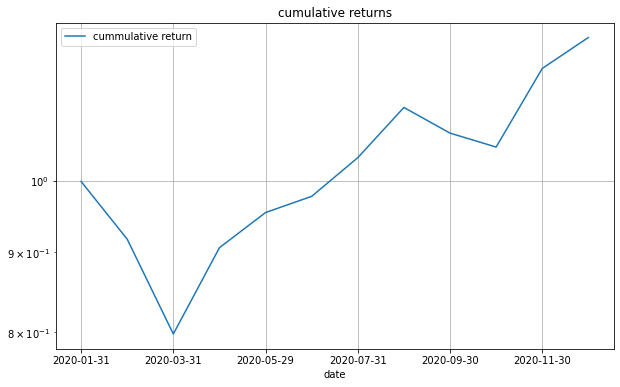

In [19]:
# cumulative returns
returns = opbe_data.groupby(['date']).apply(lambda x: np.average(x.retadj, weights=x.lag_me))

((1+returns).cumprod()).plot(grid=True, logy=True, title="cumulative returns", label='cummulative return')
plt.legend()